# Homework 6 Part 2
Toby Chappell


In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from scipy.spatial import distance

#### Question 1

a. Read in the dataset ‘zip.train’ using the pandas ‘read_csv’ function. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function to find the right parameters to properly read in this dataset. You might want to open the dataset in a text editor to inspect its structure.

In [4]:
digits = pd.read_csv("zip.train",header=None,delim_whitespace=True,index_col=False)
digits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


b. This dataset contains handwritten digits from 0 to 9. The first column contains the label (0-9) of each record. Each digit has 256 columns, each representing a pixel in a 16x16 image. Choose one row, use the ‘reshape’ function in numpy to reshape the row vector to 16x16, and use matplotlib to visualize the image.

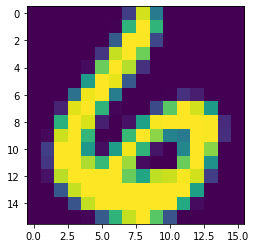

In [5]:
six = np.array(digits.loc[0,1:]).reshape(16,16)
plt.imshow(six)

c. Select a subset of the dataset with one digit of your choice. Perform PCA on the subset and show the percentage of variance you keep with 2 principal components. (You might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) to see how to properly fit and transform the dataset using scikit-learn.)

In [6]:
six = digits[digits[0]==6].loc[:,1:]
pca = PCA(n_components=2)
six_pca = pca.fit_transform(six)
print("Percentage of Variance Kept: ", sum(pca.explained_variance_ratio_)*100, "%")

Percentage of Variance Kept:  34.30481507009732 %


d. Plot a scatter plot of the data with the first two principal components. Find 25 records as is shown in the figure below (the red circles approximately constitute a 5x5 grid). Reshape them into images and plot them accordingly (as 5x5 [subplots](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.subplot.html)).

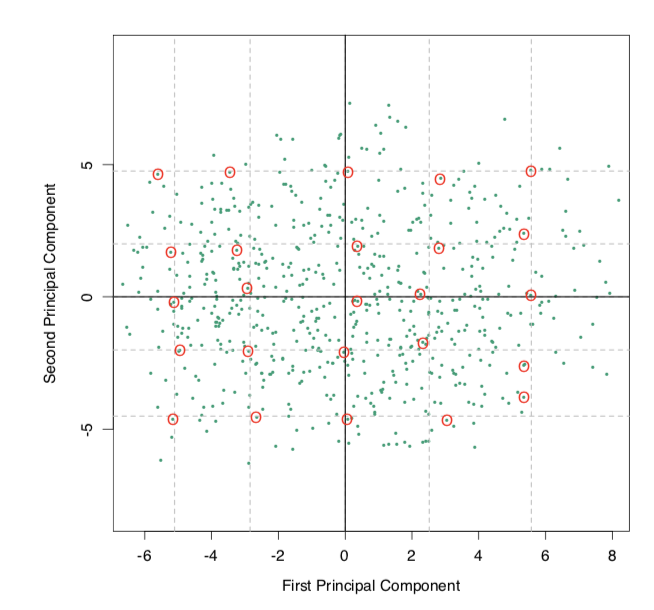

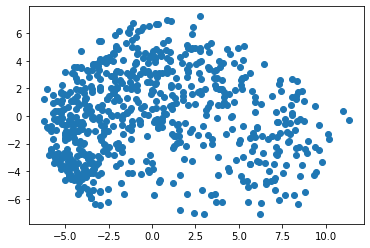

In [7]:
plt.scatter(six_pca[:,0],six_pca[:,1])

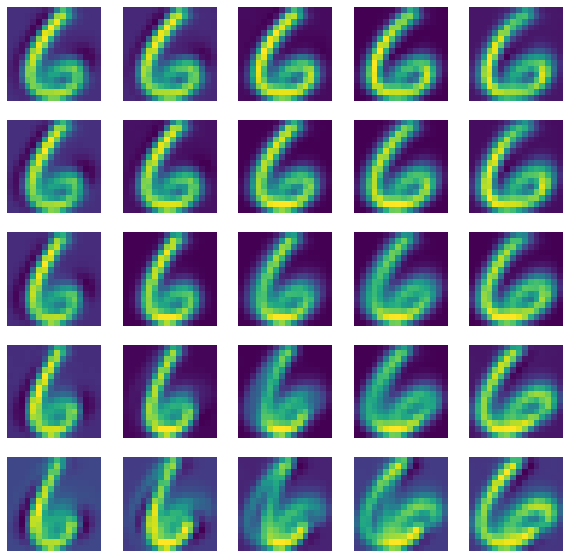

In [25]:
x = -5
y = 5
plt.figure(figsize=(10,10))
for i in range(1,26):
  if x > 5:
    x = -5
    y = y - 2.5
  r = 0
  records = six_pca[(six_pca[:,0]<=max(x+r,x-r)) & (six_pca[:,0]>=min(x+r,x-r)) & (six_pca[:,1]<=max(y+r,y-r)) & (six_pca[:,1]>=min(y+r,y-r))]
  while records.size == 0:
    r = r + .001
    records = six_pca[(six_pca[:,0]<=max(x+r,x-r)) & (six_pca[:,0]>=min(x+r,x-r)) & (six_pca[:,1]<=max(y+r,y-r)) & (six_pca[:,1]>=min(y+r,y-r))]
  index = np.random.choice(records.shape[0])
  record = records[index]
  six_compressed = pca.inverse_transform(record)
  six_compressed = six_compressed.reshape(16,16)
  plt.subplot(5,5,i)
  plt.axis('off')
  plt.imshow(six_compressed)
  x = x + 2.5

e. Discuss what you see in the 5x5 image plot. What do you think are the features that the two principal components are capturing? When thinking about this, take into account that all PCA does is maximize variance, as discussed in class. 

It appears that the two features are attempting to capture the shape of the number 6. Looking at the extremes (the corner subplots) the shape of the number look starkly different:
*   Top Left: Has the largest gap between the loop and the rest of the number
*   Top Right: Has a very large loop that is more to the right 
*   Bottom Left: Skinniest 6 drawn in terms of width
*   Bottom Right: Widest drawn 6 with a very large loop more off to the right

Since PCA is attempting to maximize the variance, these traits differ the largest in the dataset.



